In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model as lm
import sklearn as sk

In [35]:
data = pd.read_csv('C:/Users/karagiag/Downloads/GE.csv', index_col=0, parse_dates=True)

In [36]:
data = data.sort_index()

In [37]:
data['ret']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

In [21]:
factors = pd.read_csv('C:/Users/karagiag/Downloads/FF_Factors_daily.csv')

In [22]:
factors['Date'] = pd.to_datetime(factors['Date'],format='%Y%m%d', errors='coerce')

In [23]:
factors=factors.set_index('Date')

In [27]:
factors = factors.drop(factors.tail(2).index)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14059 entries, 1962-01-02 to 2017-11-03
Data columns (total 7 columns):
Open         14059 non-null float64
High         14059 non-null float64
Low          14059 non-null float64
Close        14059 non-null float64
Adj Close    14059 non-null float64
Volume       14059 non-null int64
ret          14058 non-null float64
dtypes: float64(6), int64(1)
memory usage: 878.7 KB


In [39]:
data = pd.concat([data,factors],join='inner', axis=1)

In [40]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,ret,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,
1962-01-02,0.781250,0.794271,0.773438,0.778646,0.137868,2073600,NaN,-0.80,0.83,0.64,0.011
1962-01-03,0.774740,0.774740,0.768229,0.770833,0.136485,1420800,-0.010082,0.24,0.16,1.06,0.011
1962-01-04,0.770833,0.777344,0.755208,0.761719,0.134871,1766400,-0.011896,-0.83,0.03,0.65,0.011
1962-01-05,0.761719,0.763021,0.729167,0.742188,0.131413,2620800,-0.025974,-1.34,0.14,0.23,0.011
1962-01-08,0.742188,0.742188,0.718750,0.740885,0.131182,2976000,-0.001759,-0.75,0.20,0.32,0.011


In [41]:
data = data.drop(data.head(1).index)

In [42]:
data['ret']=data['ret']-data['RF']

In [43]:
data = data.drop(data.columns[[0,1,2,3,4,5]], axis=1)

In [44]:
data.head()

,ret,Mkt-RF,SMB,HML,RF
Date,,,,,
1962-01-03,-0.021082,0.24,0.16,1.06,0.011
1962-01-04,-0.022896,-0.83,0.03,0.65,0.011
1962-01-05,-0.036974,-1.34,0.14,0.23,0.011
1962-01-08,-0.012759,-0.75,0.20,0.32,0.011
1962-01-09,-0.005739,0.02,-0.09,0.31,0.011


In [179]:
data.to_csv('C:/Users/karagiag/Downloads/GE-FF.csv')

In [45]:
X = data.iloc[:,1:4]

In [182]:
X.head()

,Mkt-RF,SMB,HML
Date,,,
1962-01-03,0.24,0.16,1.06
1962-01-04,-0.83,0.03,0.65
1962-01-05,-1.34,0.14,0.23
1962-01-08,-0.75,0.20,0.32
1962-01-09,0.02,-0.09,0.31


In [47]:
y = data['ret']

In [48]:
from sklearn import model_selection

In [183]:
#We split our set into training set and testing set(75/25 split) randomly selected
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, shuffle = False)

In [156]:
#Data Preprocessing
#The neural network may have difficulty converging before the maximum number of iterations 
#allowed if the data is not normalized. 
#Multi-layer Perceptron is sensitive to feature scaling, 
#so it is highly recommended to scale your data. 
#Note that you must apply the same scaling to the test set for meaningful results. 
#There are a lot of different methods for normalization of data, 
#we will use the built-in StandardScaler for standardization.

In [157]:
X_train = sk.preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = sk.preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [158]:
#Training the model
from sklearn.neural_network import multilayer_perceptron as mlp

In [159]:
nn = mlp.MLPRegressor(activation='identity',hidden_layer_sizes=(50,), verbose=True,learning_rate='adaptive',tol=0.0000000001,max_iter = 50,early_stopping=True)

In [160]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.11043698
Validation score: -4.875872
Iteration 2, loss = 0.00062731
Validation score: 0.306713
Iteration 3, loss = 0.00011620
Validation score: 0.367810
Iteration 4, loss = 0.00011217
Validation score: 0.368895
Iteration 5, loss = 0.00011225
Validation score: 0.368277
Iteration 6, loss = 0.00011254
Validation score: 0.363977
Iteration 7, loss = 0.00011224
Validation score: 0.366842
Validation score did not improve more than tol=0.000000 for two consecutive epochs. Stopping.


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-10, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [161]:
y_predictions = nn.predict(X_test)

In [162]:
nn.score(X_train,y_train)

0.37061326906527625

In [109]:
nn.n_iter_

10

In [118]:
nn.n_layers_

3

In [140]:
# Compare with multilinear regression
import statsmodels.api as sm

In [165]:
model = sm.OLS(y_train,X_train)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     633.8
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        18:20:57   Log-Likelihood:                 23120.
No. Observations:               10509   AIC:                        -4.623e+04
Df Residuals:                   10506   BIC:                        -4.621e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0104      0.000     30.659      0.0

In [166]:
y_hat = res.predict(X_test)

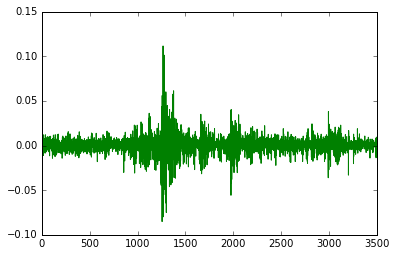

In [176]:
#Plot OLS predicted values
%matplotlib inline
plt.plot(y_hat,'g')
plt.xlim(0,3500);

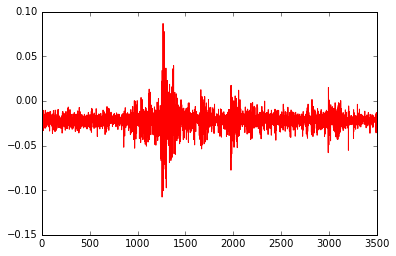

In [175]:
#Plot NN predicted values
plt.plot(y_predictions,'r')
plt.xlim(0,3500);

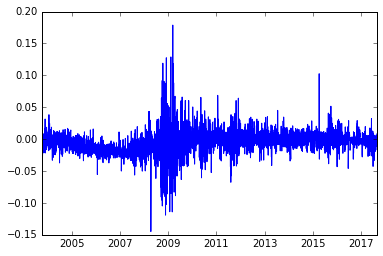

In [178]:
#Plot actual (true) returns
plt.plot(y_test,'b')

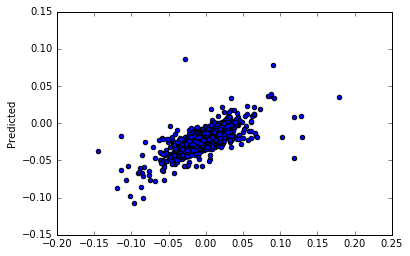

In [184]:
fig, ax=plt.subplots()
plt.scatter(y_test,y_predictions)
plt.ylabel('Measured')
plt.ylabel('Predicted')